In [45]:
from fastai.tabular.all import *

In [46]:
df = pd.read_feather('../data/train_categories.feather')
df.head()

,item_condition_id,Cat1,Cat2,Cat3,Cat4,Cat5,brand_name,shipping,price
0,3,Men,Tops,T-shirts,None,None,None,1,10.0
1,3,Electronics,Computers & Tablets,Components & Parts,None,None,Razer,0,52.0
2,1,Women,Tops & Blouses,Blouse,None,None,Target,1,10.0
3,1,Home,Home Décor,Home Décor Accents,None,None,None,1,35.0
4,1,Women,Jewelry,Necklaces,None,None,None,0,44.0


In [47]:
len(df)

1482535

In [49]:
dls = TabularDataLoaders.from_df(df, y_names="price", cat_names=['item_condition_id', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5' , 'brand_name', 'shipping'],  procs = [Categorify, FillMissing, Normalize], device=torch.device('cuda'), bs=4096)

/home/omlnaut/mambaforge/envs/pricing/lib/python3.10/site-packages/fastai/tabular/core.py:279: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  to.conts = (to.conts-self.means) / self.stds


In [50]:
learn = tabular_learner(dls, metrics=mae)

SuggestedLRs(valley=0.03981071710586548)

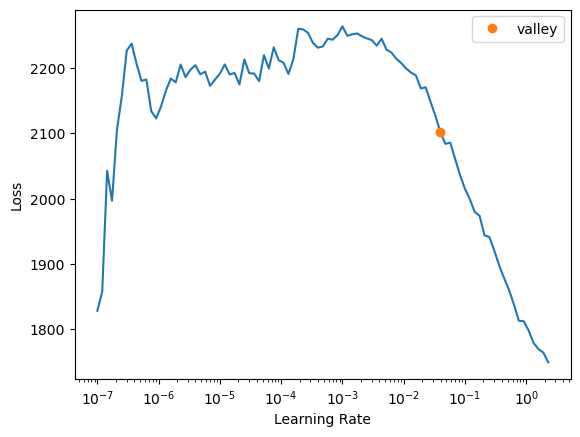

In [51]:
learn.lr_find()

In [52]:
learn.fit_one_cycle(10, lr_max=slice(1e-2, 1e-1))

epoch,train_loss,valid_loss,mae,time
0,1028.920654,1035.919556,13.715985,00:11
1,994.907471,1047.515137,13.534990,00:10
2,991.143677,1004.563904,12.857592,00:11
3,998.461426,1082.604370,13.812793,00:11


KeyboardInterrupt: 

SuggestedLRs(valley=0.00019054606673307717)

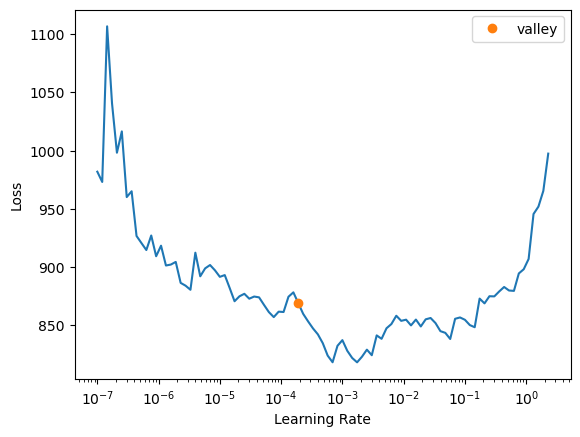

In [13]:
learn.lr_find()

In [14]:
learn.fit_one_cycle(10, lr_max=1e-4)

epoch,train_loss,valid_loss,mae,time
0,863.863342,954.869751,13.034154,00:14
1,942.995850,954.904053,13.051149,00:13
2,943.489075,955.017822,13.085042,00:13
3,925.101562,954.379028,13.056796,00:14
4,843.889587,954.041687,13.031257,00:12
5,877.602661,955.045593,13.054192,00:12
6,907.045410,955.877319,13.114348,00:12
7,875.449036,955.131592,13.071156,00:14
8,880.439148,954.280151,13.002502,00:11
9,886.517578,955.356262,13.059822,00:13


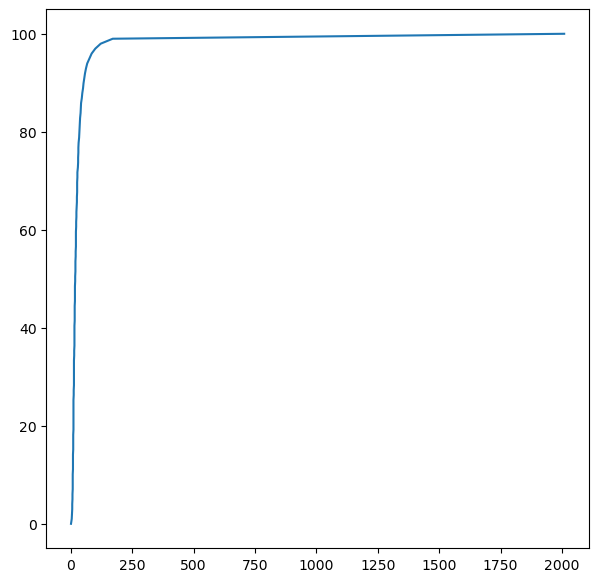

In [22]:
ps = np.linspace(0,100, 100)
fig, ax = plt.subplots(figsize=(7,7))

ax.plot(np.percentile(df.price, ps), ps)

plt.show()

In [53]:
cutoff = np.percentile(df.price, 99)
df = df[df.price<=cutoff]
len(df)

1467794

In [54]:
df.reset_index().to_feather('../data/price_cutoff.feather')

In [57]:
# df = pd.read_feather('../data/price_cutoff.feather')
dls = TabularDataLoaders.from_df(df, y_names="price", cat_names=['item_condition_id', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'brand_name', 'shipping'],  procs = [Categorify, FillMissing, Normalize], device=torch.device('cuda'), bs=4096)

/home/omlnaut/mambaforge/envs/pricing/lib/python3.10/site-packages/fastai/tabular/core.py:279: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  to.conts = (to.conts-self.means) / self.stds


In [37]:
df.dtypes

index                  int64
item_condition_id      int64
Cat1                  object
Cat2                  object
Cat3                  object
Cat4                  object
Cat5                  object
brand_name            object
shipping               int64
price                float64
dtype: object

SuggestedLRs(valley=0.015848932787775993)

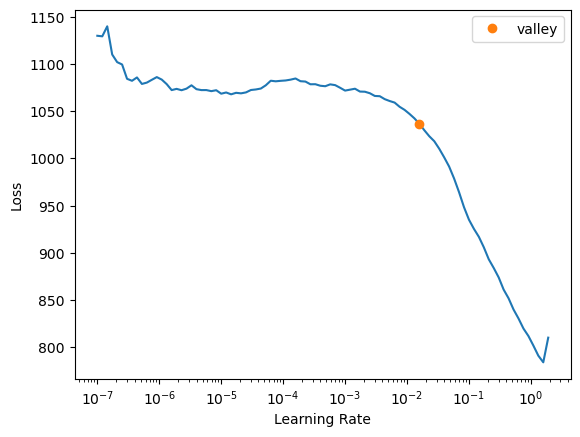

In [58]:
learn = tabular_learner(dls, metrics=mae)
learn.lr_find()

In [59]:
learn.fit_one_cycle(5, 1e-1)

epoch,train_loss,valid_loss,mae,time
0,319.009918,321.002228,10.800392,00:13
1,307.950378,307.518951,10.578816,00:13
2,302.322235,303.152496,10.761388,00:12
3,296.475586,296.638580,10.662110,00:11
4,292.042511,295.454498,10.552866,00:12
